# Projet 1 – TP : Prédiction de la qualité du vin

### Importer le bibliotheque

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score , mean_squared_error , confusion_matrix , classification_report


from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier



### Importer le dataset

In [2]:
df_win_red =  pd.read_csv('D:/Projet_machine_learning/Data/winequality-red.csv' , sep=';')
df_win_white = pd.read_csv("D:/Projet_machine_learning/Data/winequality-white.csv" , sep=";")

df_win_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_win_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df_wine = pd.concat([df_win_red , df_win_white] , ignore_index= True)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Analyser le dataset

In [5]:
print("ligne_colonne : " , df_wine.shape , "taille : ", df_wine.size , "dimension :" , df_wine.ndim )

ligne_colonne :  (6497, 12) taille :  77964 dimension : 2


In [6]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df_wine["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [9]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Visualisation 

In [10]:
# sns.pairplot(df_wine)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

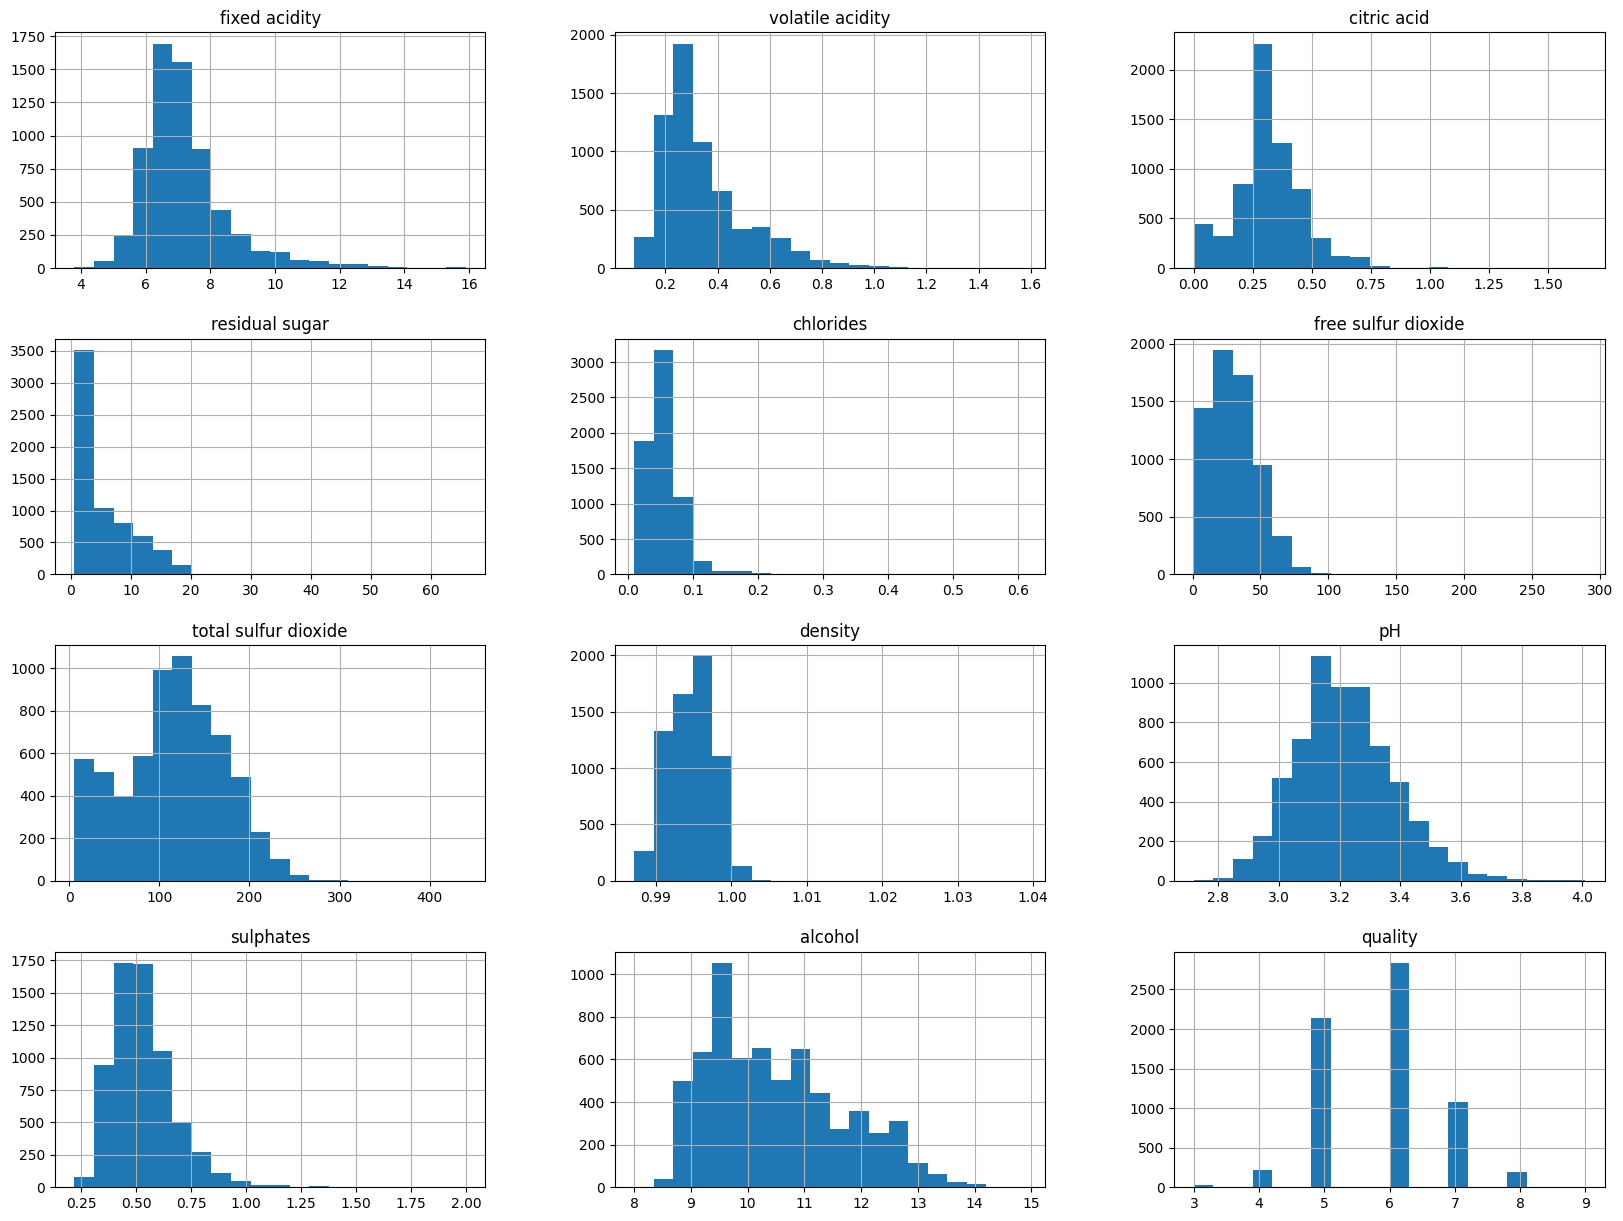

In [11]:
df_wine.hist(bins=20  , figsize=(20 , 15))

<Axes: >

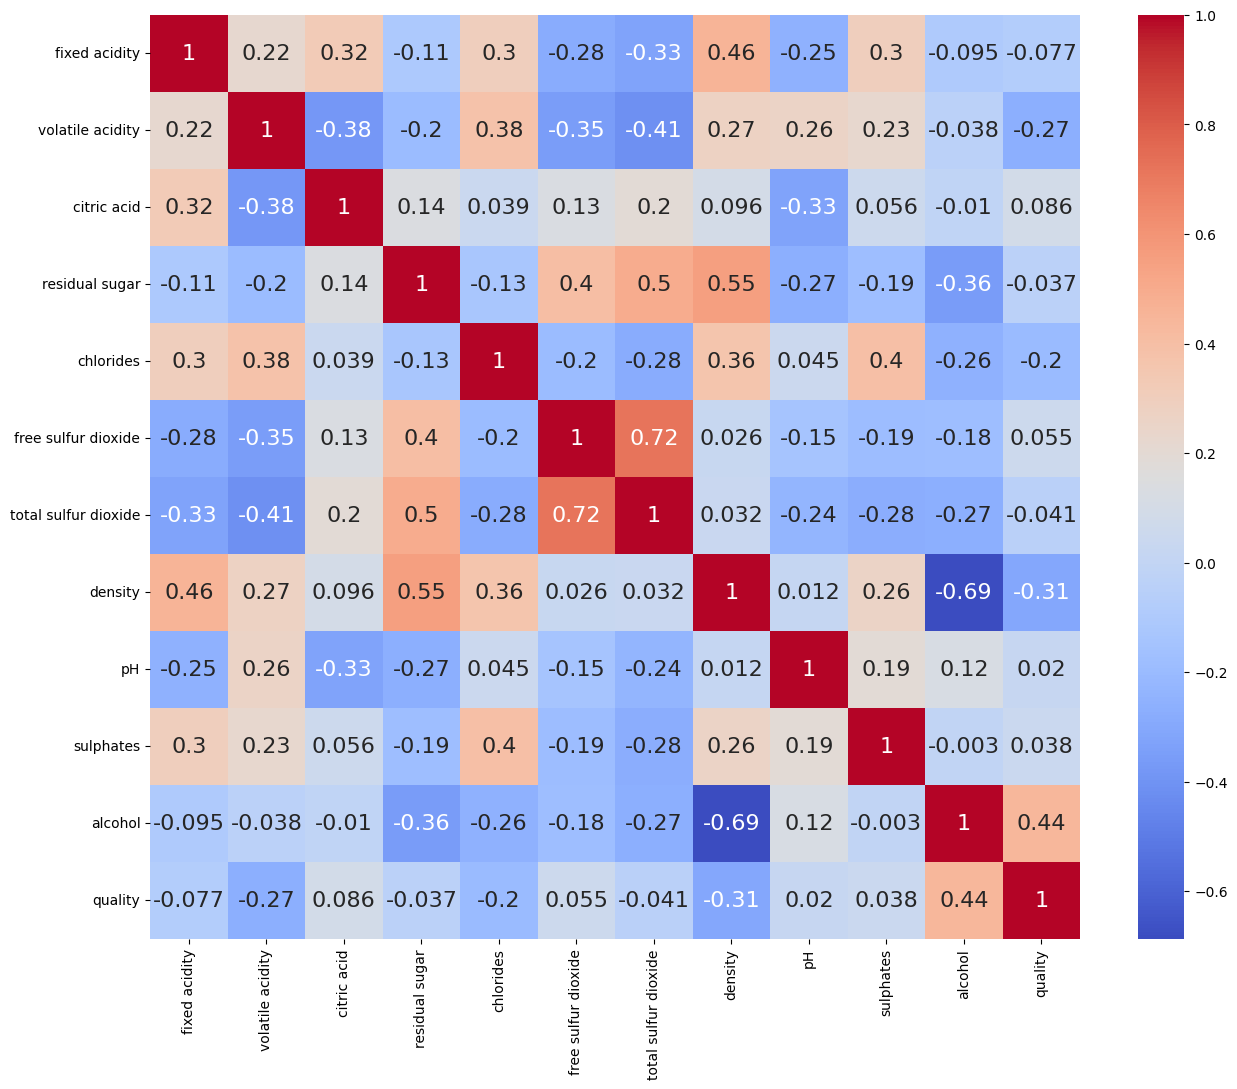

In [12]:
fig, ax = plt.subplots(figsize = (15,12))
sns.heatmap(df_wine.corr(), annot = True, cmap = "coolwarm", ax = ax, annot_kws = {"fontsize" : 16}) 

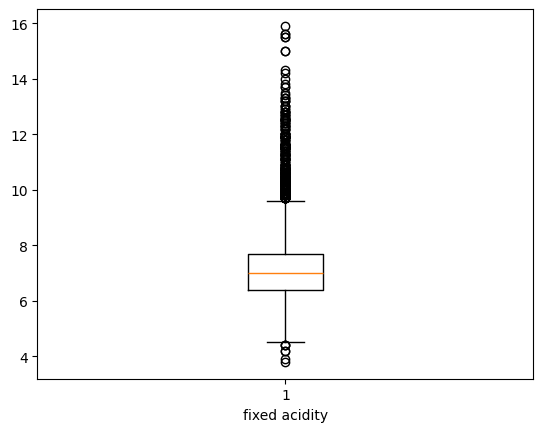

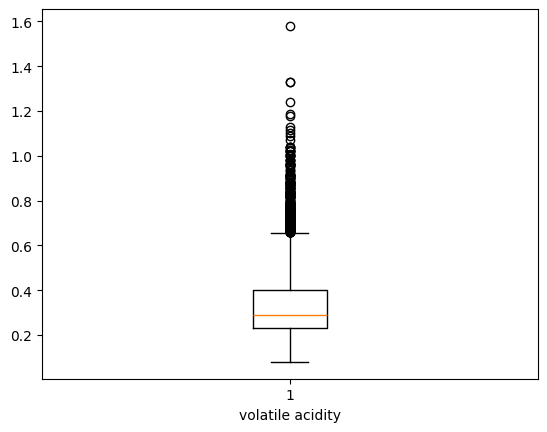

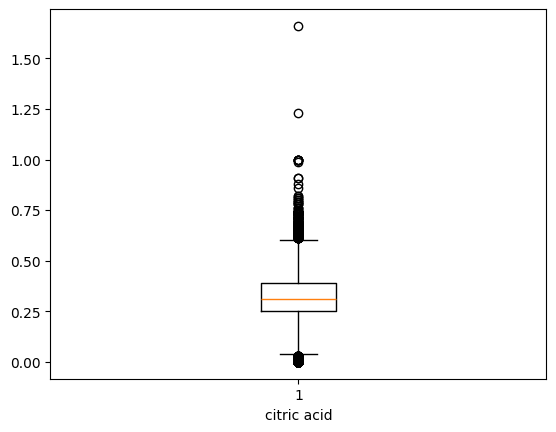

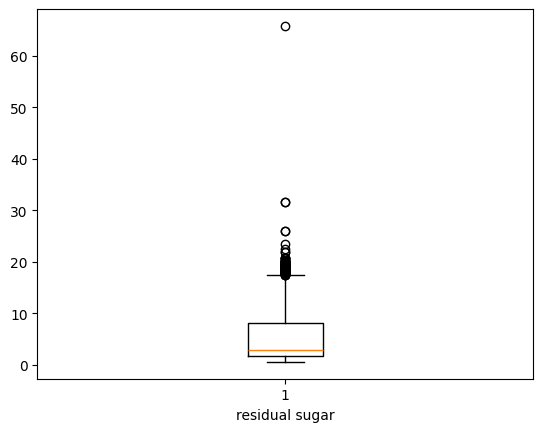

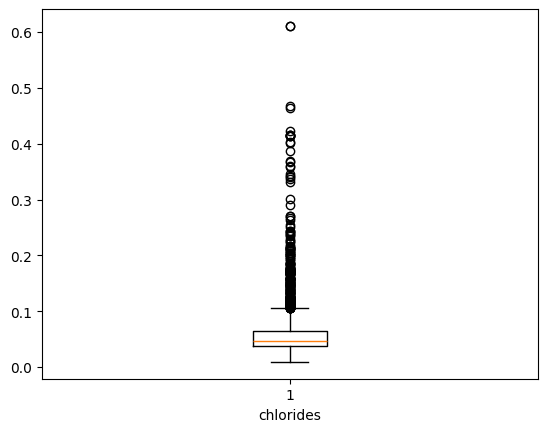

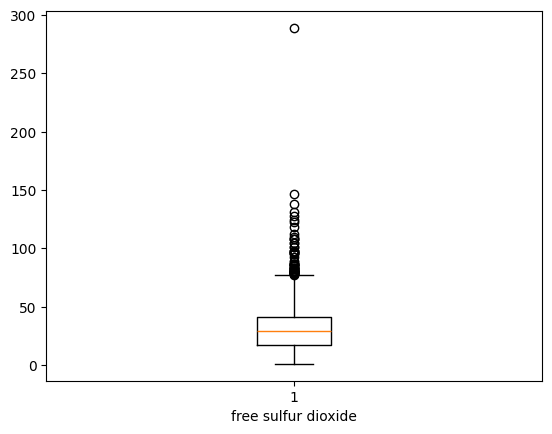

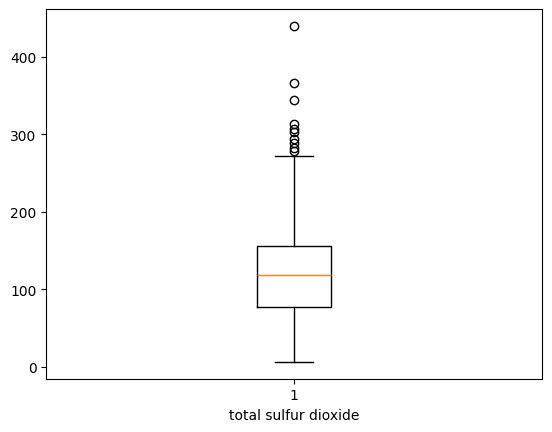

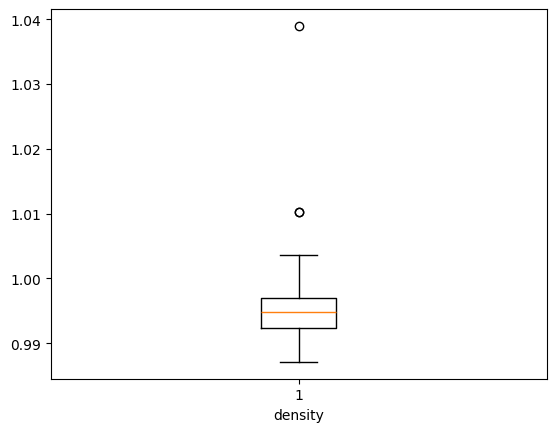

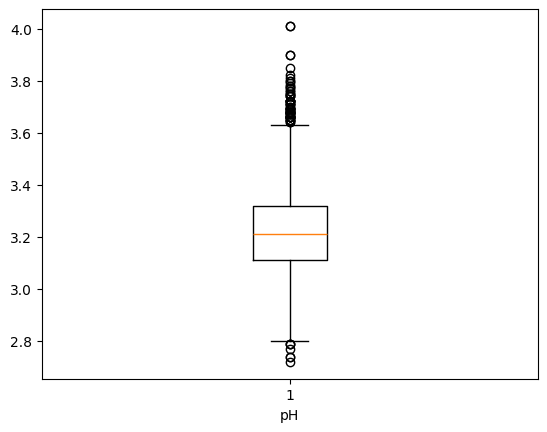

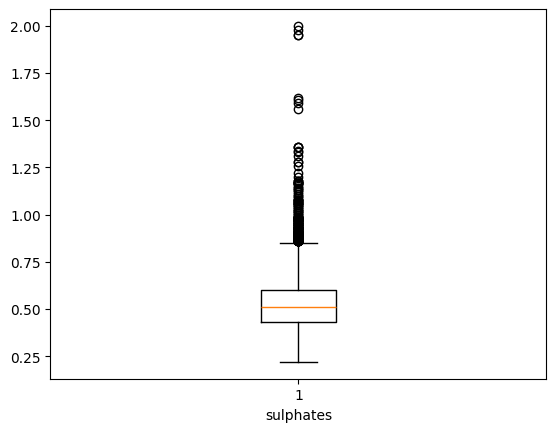

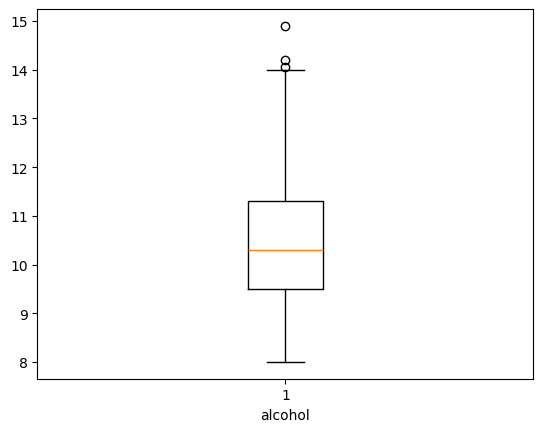

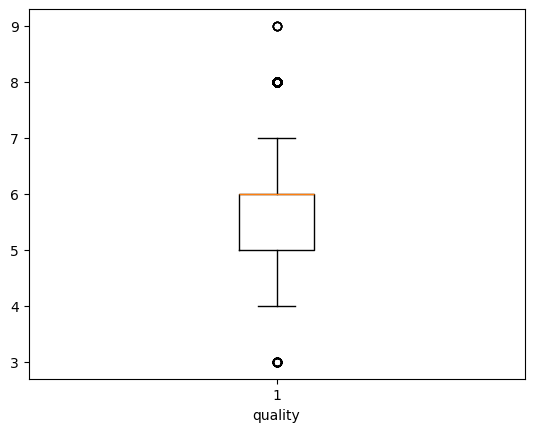

In [13]:
for i in df_wine.columns:
    plt.boxplot(df_wine[i])
    plt.xlabel(i)
    plt.show()

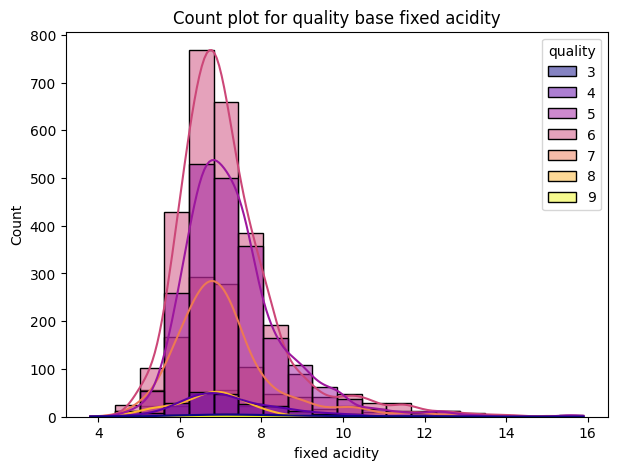

In [14]:
plt.figure(figsize = (7, 5))
sns.histplot(df_wine, x = "fixed acidity" , hue = "quality" , kde = True, bins = 20, palette = "plasma")
plt.title("Count plot for quality base fixed acidity")
plt.xlabel("fixed acidity")
plt.ylabel("Count")
plt.show()

In [15]:
df_wine["quality"].value_counts().sort_index()

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

<Axes: >

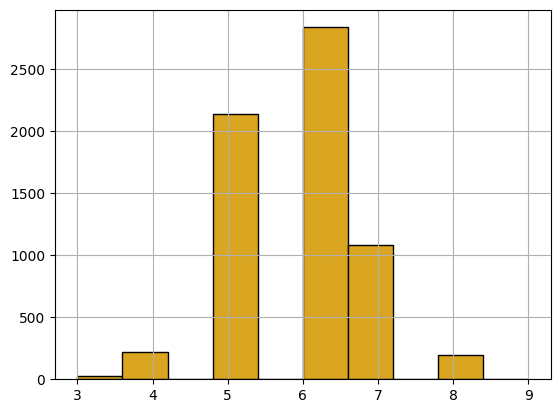

In [16]:
df_wine["quality"].hist(bins = 10 , color="goldenrod", edgecolor="black" )

In [17]:
df_wine["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [18]:
def simplify_quality(q):
    if q <= 5:
        return 0  # qualité basse
    elif q == 6:
        return 1  # moyenne
    else:
        return 2  # haute

df_wine['quality'] = df_wine['quality'].apply(simplify_quality)


df_wine.head()

print(df_wine['quality'].value_counts())



quality
1    2836
0    2384
2    1277
Name: count, dtype: int64


### creer un algorithme 

In [19]:
## Diviser le dataset
Y = df_wine["quality"]
x = df_wine.drop("quality" , axis=1)

x_train , x_test , Y_train , Y_test = train_test_split(x , Y , test_size= 0.2 , random_state=40)


In [20]:
## normaliser les données d'entréé

scaler = StandardScaler().fit(x_train)
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [22]:

# Initialisation des modèles
models = [
    LogisticRegression(multi_class="multinomial", max_iter=1000),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    GaussianNB()
]

model_names = [
    "Logistic Regression",
    "SVM",
    "KNN",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "Extra Trees",
    "Naive Bayes"
]

# Entraînement + Prédiction + Évaluation
for model, name in zip(models, model_names):
    model.fit(x_train_scaler, Y_train)
    y_pred = model.predict(x_test_scaler)
    accuracy = model.score(x_test_scaler, Y_test)
    
    
    print(f"📊 {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, y_pred))
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))
    print("-" * 50)
 

d:\Projet_machine_learning\envML\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📊 Logistic Regression
Accuracy: 0.5492
Confusion Matrix:
[[270 170   3]
 [152 356  79]
 [ 22 160  88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       443
           1       0.52      0.61      0.56       587
           2       0.52      0.33      0.40       270

    accuracy                           0.55      1300
   macro avg       0.55      0.51      0.52      1300
weighted avg       0.55      0.55      0.54      1300

--------------------------------------------------
📊 SVM
Accuracy: 0.6162
Confusion Matrix:
[[315 126   2]
 [146 390  51]
 [  8 166  96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       443
           1       0.57      0.66      0.61       587
           2       0.64      0.36      0.46       270

    accuracy                           0.62      1300
   macro avg       0.63      0.58      0.59      1300
weight